# Imports

In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

# Datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
num_labels = len(np.unique(y_train))

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size])
x_test = np.reshape(x_test, [-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Hyperparameter

In [6]:
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = .2

# Model

In [12]:
inputs = Input(shape = input_shape)
y = SimpleRNN(units = units, dropout=dropout)(inputs)
y = Dense(num_labels)(y)
outputs = Activation('softmax')(y)

model = Model(inputs = inputs, outputs = outputs)

In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               72960     
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


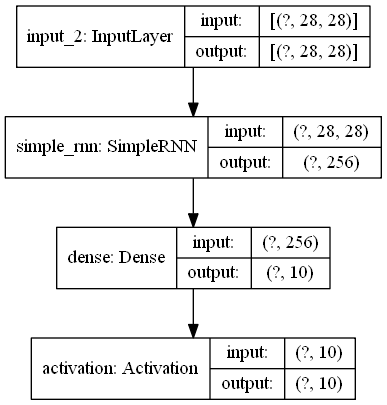

In [15]:
plot_model(model, show_shapes=True)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs = 20, batch_size = batch_size)

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.3836 - accuracy: 0.8820
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1932 - accuracy: 0.9429
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1579 - accuracy: 0.9533
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1450 - accuracy: 0.9576
Epoch 5/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1311 - accuracy: 0.9607
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1270 - accuracy: 0.9630
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1127 - accuracy: 0.9666
Epoch 8/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1134 - accuracy: 0.9663
Epoch 9/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1084 - accuracy: 0.9671
Epoch 10/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1032 - accura

In [18]:
loss, acc = model.evaluate(x_test, y_test, batch_size= batch_size)
print('\nTest accuracy: %.1f%%' % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9716

Test accuracy: 97.2%
